# 1. 규칙 기반 챗봇

## 1.1. 단어 기준 답변 생성

In [1]:
def answer(question):
    if '날씨' in question:
        return '날씨는 맑습니다.'

In [2]:
answer('오늘 날씨는 어떻게 되나요?')

'날씨는 맑습니다.'

In [3]:
answer('날씨가 어때?')

'날씨는 맑습니다.'

In [4]:
answer('오늘 날이 어떤가요?')

In [5]:
def answer(question):
    if '날씨' in question:
        return '날씨는 맑습니다.'
    else:
        return '무슨 말인지 모르겠습니다.'

In [6]:
answer('오늘 날이 어떤가요?')

'무슨 말인지 모르겠습니다.'

In [7]:
def answer(question):
    if '날씨' in question and '기온' in question:
        return '오늘 날씨는 맑고 기온은 10도 입니다.'
    else:
        return '무슨 말인지 모르겠습니다.'

In [8]:
answer('오늘 날씨와 기온은?')

'오늘 날씨는 맑고 기온은 10도 입니다.'

In [9]:
answer('오늘 날씨는?')

'무슨 말인지 모르겠습니다.'

In [10]:
def answer(question):
    if '날씨' in question:
        return '오늘 날씨는 맑고 기온은 10도 입니다.'
    elif '기온' in question:
        return '오늘 날씨는 맑고 기온은 10도 입니다.'
    else:
        return '무슨 말인지 모르겠습니다.'

In [11]:
answer('오늘 날씨는?')

'오늘 날씨는 맑고 기온은 10도 입니다.'

In [12]:
def answer(question):
    if '날씨' in question or '기온' in question:
        return '오늘 날씨는 맑고 기온은 10도 입니다.'
    else:
        return '무슨 말인지 모르겠습니다.'

In [13]:
answer('오늘 날씨는?')

'오늘 날씨는 맑고 기온은 10도 입니다.'

In [1]:
words = ['날씨', '기온', 'weather', '비',' 우산', '구름']

In [2]:
def answer(question, words):
    for word in words:
        if word in question:
            return '오늘 날씨는 맑고 기온은 10도 입니다.'
    return '무슨 말인지 모르겠습니다.'

In [3]:
answer('오늘 비와?', words)

'오늘 날씨는 맑고 기온은 10도 입니다.'

In [17]:
answer('how is the weather', words)

'오늘 날씨는 맑고 기온은 10도 입니다.'

In [18]:
import pandas as pd

In [19]:
w = pd.read_csv('data/날씨키워드.csv', engine='python', encoding='euc-kr')
w.head()

,키워드
0,날씨
1,기온
2,비
3,우산
4,구름


In [20]:
def answer(question):
    w = pd.read_csv('data/날씨키워드.csv', engine='python', encoding='euc-kr')
    for word in w.values:
        if word[0] in question:
            return '오늘 날씨는 구름이 적고 맑을 예정입니다.'
    return '무슨 말인지 모르겠습니다.'

In [21]:
 answer('오늘 날씨가 어떨것 같아?')

'오늘 날씨는 구름이 적고 맑을 예정입니다.'

In [22]:
answer('비가 올것 같은데...')

'오늘 날씨는 구름이 적고 맑을 예정입니다.'

In [23]:
answer('오늘 축구 비겼어?')

'오늘 날씨는 구름이 적고 맑을 예정입니다.'

In [24]:
answer('고기온도가 어때?')

'오늘 날씨는 구름이 적고 맑을 예정입니다.'

In [25]:
from konlpy.tag import Twitter, Komoran

In [26]:
tagger = Komoran()

In [27]:
tagger.nouns('고기온도가 어때')

['고기', '온도']

In [28]:
tagger.nouns('오늘 축구 비겼어?')

['오늘', '축구']

In [29]:
def answer(question):
    w = pd.read_csv('data/날씨키워드.csv', engine='python', encoding='euc-kr')
    nouns = tagger.nouns(question)
    for word in w.values:
        if word[0] in nouns:
            return '오늘 날씨는 구름이 적고 맑을 예정입니다.'
    return '무슨 말인지 모르겠습니다.'

In [30]:
answer('오늘 축구 비겼어?')

'무슨 말인지 모르겠습니다.'

In [31]:
answer('고기온도가 어때?')

'무슨 말인지 모르겠습니다.'

In [32]:
answer('오늘 기온이 어때?')

'오늘 날씨는 구름이 적고 맑을 예정입니다.'

In [33]:
import re

In [34]:
r = re.compile(r'((?P<date>.+) 날씨)')

In [35]:
m = r.match('오늘 날씨')
m.groupdict()

{'date': '오늘'}

In [36]:
def get_date(question):
    m = r.match(question)
    group = m.groupdict()
    date = group['date']
    return date

In [37]:
get_date('내일 날씨 알려줘')

'내일'

In [38]:
r = re.compile(r'((?P<place>.+) 날씨)')

In [39]:
m = r.match('서울의 날씨는 어때')
m.groupdict()

{'place': '서울의'}

In [40]:
group = m.groupdict()
place = group['place']
tagger.nouns(place)

['서울']

In [41]:
def get_place(question):
    r = re.compile(r'((?P<place>.+) 날씨)')
    m = r.match(question)
    group = m.groupdict()
    place = group['place']
    return tagger.nouns(place)

In [42]:
get_place('제주도 날씨')

['제주도']

In [43]:
get_place('서울의 날씨는 어떻게 되나요?')

['서울']

In [44]:
r = re.compile(r'((?P<date>\S+) )?((?P<place>\S+) )?날씨')

In [45]:
group = r.match('내일 서울 날씨는 어떨까?').groupdict()
group

{'date': '내일', 'place': '서울'}

In [46]:
def get_date_place(question):
    r = re.compile(r'((?P<date>\S+) )?((?P<place>\S+) )?날씨')
    m = r.match(question)
    group = m.groupdict()
    
    if group['date']:
        group['date'] = tagger.nouns(group['date'])
    if group['place']:
        group['place'] = tagger.nouns(group['place'])
    return group

In [47]:
get_date_place('오늘 서울의 날씨는 어때?')

{'date': ['오늘'], 'place': ['서울']}

In [48]:
get_date_place('내일의 날씨는 어떨까?')

{'date': ['내일'], 'place': None}

In [49]:
w_date = {'오늘': '오늘은 전국적으로 비가 내릴 것으로 예상됩니다.', '내일': '내일은 전국적으로 화창할 것으로 예상됩니다.'}
w_place = {'서울': '서울의 최고 기온은 25도, 최저 기온은 20도입니다.', '제주도':'제주도의 최고 기온은 23도, 최저 기온은 18도입니다.'}

In [50]:
answer = get_date_place('오늘 서울의 날씨는 어때?')
answer['date'][0]

'오늘'

In [51]:
w_date[answer['date'][0]]

'오늘은 전국적으로 비가 내릴 것으로 예상됩니다.'

In [52]:
def get_date_place(question):
    r = re.compile(r'((?P<date>\S+) )?((?P<place>\S+) )?날씨')
    m = r.match(question)

    if m:
        group = m.groupdict()

        date = tagger.nouns(group['date'])
        segment = w_date[date[0]]

        if group['place']:
            place = tagger.nouns(group['place'])
            segment2 = w_place[place[0]]
            segment = segment + '\n' + segment2

    else:
        segment = '무슨말인지 모르겠습니다.'
    print(segment)

In [53]:
get_date_place('오늘 서울의 날씨는 어떨까?')

오늘은 전국적으로 비가 내릴 것으로 예상됩니다.
서울의 최고 기온은 25도, 최저 기온은 20도입니다.


In [54]:
get_date_place('내일 날씨?')

내일은 전국적으로 화창할 것으로 예상됩니다.


In [55]:
get_date_place('피자 주문해줘')

무슨말인지 모르겠습니다.


## 1.2. LSTM 기반 질문 분류기

### 1.2.1. 순방향 LSTM

In [56]:
data_arg = ['오늘', '오늘은','내일','내일은']
data_pred = ['날씨?','날씨는?','날씨 어때?', '날씨가 어때?']

In [57]:
data=[]

for arg in data_arg:
    for pred in data_pred:
        sentence = arg + ' ' + pred
        data.append(sentence)

In [58]:
data

['오늘 날씨?',
 '오늘 날씨는?',
 '오늘 날씨 어때?',
 '오늘 날씨가 어때?',
 '오늘은 날씨?',
 '오늘은 날씨는?',
 '오늘은 날씨 어때?',
 '오늘은 날씨가 어때?',
 '내일 날씨?',
 '내일 날씨는?',
 '내일 날씨 어때?',
 '내일 날씨가 어때?',
 '내일은 날씨?',
 '내일은 날씨는?',
 '내일은 날씨 어때?',
 '내일은 날씨가 어때?']

In [59]:
MAXLEN = max(len(s) for s in data)
MAXLEN

11

In [60]:
from keras.preprocessing.text import Tokenizer

C:\Users\Hyunsil\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [61]:
tok = Tokenizer(char_level=True)
tok.fit_on_texts(data)
tok.word_index

{' ': 1,
 '날': 2,
 '씨': 3,
 '?': 4,
 '오': 5,
 '늘': 6,
 '어': 7,
 '때': 8,
 '은': 9,
 '내': 10,
 '일': 11,
 '는': 12,
 '가': 13}

In [62]:
sequence = tok.texts_to_sequences(data)
sequence

[[5, 6, 1, 2, 3, 4],
 [5, 6, 1, 2, 3, 12, 4],
 [5, 6, 1, 2, 3, 1, 7, 8, 4],
 [5, 6, 1, 2, 3, 13, 1, 7, 8, 4],
 [5, 6, 9, 1, 2, 3, 4],
 [5, 6, 9, 1, 2, 3, 12, 4],
 [5, 6, 9, 1, 2, 3, 1, 7, 8, 4],
 [5, 6, 9, 1, 2, 3, 13, 1, 7, 8, 4],
 [10, 11, 1, 2, 3, 4],
 [10, 11, 1, 2, 3, 12, 4],
 [10, 11, 1, 2, 3, 1, 7, 8, 4],
 [10, 11, 1, 2, 3, 13, 1, 7, 8, 4],
 [10, 11, 9, 1, 2, 3, 4],
 [10, 11, 9, 1, 2, 3, 12, 4],
 [10, 11, 9, 1, 2, 3, 1, 7, 8, 4],
 [10, 11, 9, 1, 2, 3, 13, 1, 7, 8, 4]]

In [63]:
from keras.preprocessing.sequence import pad_sequences

In [64]:
padded = pad_sequences(sequence, padding='pre')
padded

array([[ 0,  0,  0,  0,  0,  5,  6,  1,  2,  3,  4],
       [ 0,  0,  0,  0,  5,  6,  1,  2,  3, 12,  4],
       [ 0,  0,  5,  6,  1,  2,  3,  1,  7,  8,  4],
       [ 0,  5,  6,  1,  2,  3, 13,  1,  7,  8,  4],
       [ 0,  0,  0,  0,  5,  6,  9,  1,  2,  3,  4],
       [ 0,  0,  0,  5,  6,  9,  1,  2,  3, 12,  4],
       [ 0,  5,  6,  9,  1,  2,  3,  1,  7,  8,  4],
       [ 5,  6,  9,  1,  2,  3, 13,  1,  7,  8,  4],
       [ 0,  0,  0,  0,  0, 10, 11,  1,  2,  3,  4],
       [ 0,  0,  0,  0, 10, 11,  1,  2,  3, 12,  4],
       [ 0,  0, 10, 11,  1,  2,  3,  1,  7,  8,  4],
       [ 0, 10, 11,  1,  2,  3, 13,  1,  7,  8,  4],
       [ 0,  0,  0,  0, 10, 11,  9,  1,  2,  3,  4],
       [ 0,  0,  0, 10, 11,  9,  1,  2,  3, 12,  4],
       [ 0, 10, 11,  9,  1,  2,  3,  1,  7,  8,  4],
       [10, 11,  9,  1,  2,  3, 13,  1,  7,  8,  4]])

In [65]:
labels = []
for s in data:
    labels.append([1, 2] + [0 for _ in s[2:]])
labels

[[1, 2, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [66]:
import pandas as pd
pd.DataFrame([labels[6], list(data[6])])

,0,1,2,3,4,5,6,7,8,9
0,1,2,0,0,0,0,0,0,0,0
1,오,늘,은,,날,씨,,어,때,?


In [67]:
y = pad_sequences(labels)
y

array([[0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [68]:
y.shape

(16, 11)

In [69]:
y2 = y.reshape((16, 11, 1))
y2.shape

(16, 11, 1)

In [70]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Embedding, LSTM
from keras.layers import TimeDistributed, concatenate
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from IPython.display import Image
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from keras.utils.vis_utils import plot_model

In [71]:
NUM_CHAR = len(tok.word_index) + 1
NUM_CHAR

14

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 11, 2)             28        
_________________________________________________________________
lstm_1 (LSTM)                (None, 11, 2)             40        
_________________________________________________________________
time_distributed_1 (TimeDist (None, 11, 3)             9         
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


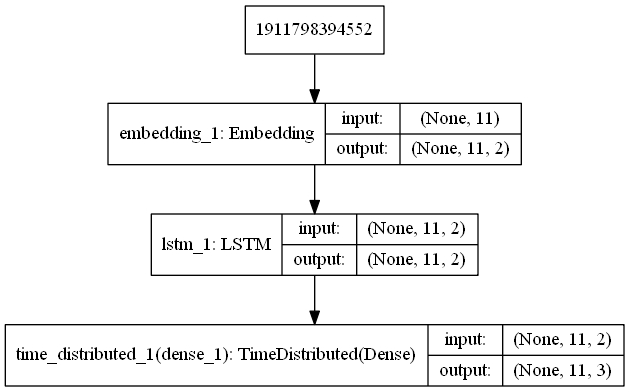

In [72]:
model = Sequential()
model.add(Embedding(NUM_CHAR, 2, input_length=MAXLEN))
model.add(LSTM(2, return_sequences=True))
model.add(TimeDistributed(Dense(3, activation='softmax')))
model.summary()
plot_model(model, to_file='model.png', show_shapes=True)
Image('model.png')

In [73]:
model.compile(optimizer=Adam(lr=.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(padded, y2, batch_size=1, epochs=300)

Epoch 1/300
16/16 [==============================] - 1s 48ms/step - loss: 0.9908 - acc: 0.8011
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 0.7032 - acc: 0.8182
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 0.5369 - acc: 0.8182
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 0.4791 - acc: 0.8182
Epoch 5/300
16/16 [==============================] - 0s 5ms/step - loss: 0.3964 - acc: 0.8182
Epoch 6/300
16/16 [==============================] - 0s 5ms/step - loss: 0.3366 - acc: 0.8182
Epoch 7/300
16/16 [==============================] - 0s 4ms/step - loss: 0.2843 - acc: 0.8182
Epoch 8/300
16/16 [==============================] - 0s 4ms/step - loss: 0.2434 - acc: 0.8920
Epoch 9/300
16/16 [==============================] - 0s 5ms/step - loss: 0.2076 - acc: 0.9091
Epoch 10/300
16/16 [==============================] - 0s 4ms/step - loss: 0.1799 - acc: 0.9091
Epoch 11/300
16/16 [==============================] - 0s 4

16/16 [==============================] - 0s 4ms/step - loss: 8.0804e-04 - acc: 1.0000
Epoch 172/300
16/16 [==============================] - 0s 5ms/step - loss: 7.9843e-04 - acc: 1.0000
Epoch 173/300
16/16 [==============================] - 0s 5ms/step - loss: 7.8887e-04 - acc: 1.0000
Epoch 174/300
16/16 [==============================] - 0s 4ms/step - loss: 7.7946e-04 - acc: 1.0000
Epoch 175/300
16/16 [==============================] - 0s 4ms/step - loss: 7.7023e-04 - acc: 1.0000
Epoch 176/300
16/16 [==============================] - 0s 5ms/step - loss: 7.6114e-04 - acc: 1.0000
Epoch 177/300
16/16 [==============================] - 0s 5ms/step - loss: 7.5218e-04 - acc: 1.0000
Epoch 178/300
16/16 [==============================] - 0s 5ms/step - loss: 7.4333e-04 - acc: 1.0000
Epoch 179/300
16/16 [==============================] - 0s 5ms/step - loss: 7.3463e-04 - acc: 1.0000
Epoch 180/300
16/16 [==============================] - 0s 5ms/step - loss: 7.2606e-04 - acc: 1.0000
Epoch 181/300


16/16 [==============================] - 0s 4ms/step - loss: 3.3432e-04 - acc: 1.0000
Epoch 254/300
16/16 [==============================] - 0s 4ms/step - loss: 3.3104e-04 - acc: 1.0000
Epoch 255/300
16/16 [==============================] - 0s 4ms/step - loss: 3.2782e-04 - acc: 1.0000
Epoch 256/300
16/16 [==============================] - 0s 4ms/step - loss: 3.2463e-04 - acc: 1.0000
Epoch 257/300
16/16 [==============================] - 0s 5ms/step - loss: 3.2149e-04 - acc: 1.0000
Epoch 258/300
16/16 [==============================] - 0s 5ms/step - loss: 3.1837e-04 - acc: 1.0000
Epoch 259/300
16/16 [==============================] - 0s 4ms/step - loss: 3.1529e-04 - acc: 1.0000
Epoch 260/300
16/16 [==============================] - 0s 4ms/step - loss: 3.1225e-04 - acc: 1.0000
Epoch 261/300
16/16 [==============================] - 0s 4ms/step - loss: 3.0925e-04 - acc: 1.0000
Epoch 262/300
16/16 [==============================] - 0s 4ms/step - loss: 3.0624e-04 - acc: 1.0000
Epoch 263/300


In [74]:
pred = model.predict(padded)
pred[0]

array([[9.9997973e-01, 1.8550531e-05, 1.6648906e-06],
       [9.9999917e-01, 8.4158341e-07, 4.8211305e-08],
       [9.9999952e-01, 5.0712845e-07, 2.7370612e-08],
       [9.9999952e-01, 4.6874524e-07, 2.5210564e-08],
       [9.9999952e-01, 4.6305007e-07, 2.4914572e-08],
       [7.5510914e-05, 9.9940360e-01, 5.2092219e-04],
       [7.8135025e-04, 2.4711108e-04, 9.9897158e-01],
       [9.9930620e-01, 1.6302927e-05, 6.7747041e-04],
       [9.9999881e-01, 9.0419661e-07, 1.8783415e-07],
       [9.9999952e-01, 5.1413099e-07, 3.3944783e-08],
       [9.9999952e-01, 4.7030079e-07, 2.6153611e-08]], dtype=float32)

In [75]:
result = pred.argmax(axis=2)
result[0]

array([0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0], dtype=int64)

In [76]:
padded[0]

array([0, 0, 0, 0, 0, 5, 6, 1, 2, 3, 4])

In [77]:
def get_key_by_value(value):
    for k, v in tok.word_index.items():
        if v==value:
            return k

In [78]:
get_value = []
for x_value, y_value in zip(padded[0], result[0]):
    if y_value != 0:
        letter = get_key_by_value(x_value)
        get_value.append([y_value, letter])

In [79]:
get_value

[[1, '오'], [2, '늘']]

In [80]:
def get_words(x, y):
    final_result = []
    sentence_num = 1
    for x_value, y_value in zip(x, y):
        date = []
        for word_num, y_label in zip(x_value, y_value):
            if y_label != 0:                           
                word = get_key_by_value(word_num)      
                date.append([y_label, word])
        final_result.append([sentence_num, date])      
        sentence_num += 1
    return final_result

In [81]:
get_words(padded, result)

[[1, [[1, '오'], [2, '늘']]],
 [2, [[1, '오'], [2, '늘']]],
 [3, [[1, '오'], [2, '늘']]],
 [4, [[1, '오'], [2, '늘']]],
 [5, [[1, '오'], [2, '늘']]],
 [6, [[1, '오'], [2, '늘']]],
 [7, [[1, '오'], [2, '늘']]],
 [8, [[1, '오'], [2, '늘']]],
 [9, [[1, '내'], [2, '일']]],
 [10, [[1, '내'], [2, '일']]],
 [11, [[1, '내'], [2, '일']]],
 [12, [[1, '내'], [2, '일']]],
 [13, [[1, '내'], [2, '일']]],
 [14, [[1, '내'], [2, '일']]],
 [15, [[1, '내'], [2, '일']]],
 [16, [[1, '내'], [2, '일']]]]

### 1.2.2. 역방향 LSTM

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 11, 2)             28        
_________________________________________________________________
lstm_2 (LSTM)                (None, 11, 2)             40        
_________________________________________________________________
time_distributed_2 (TimeDist (None, 11, 3)             9         
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


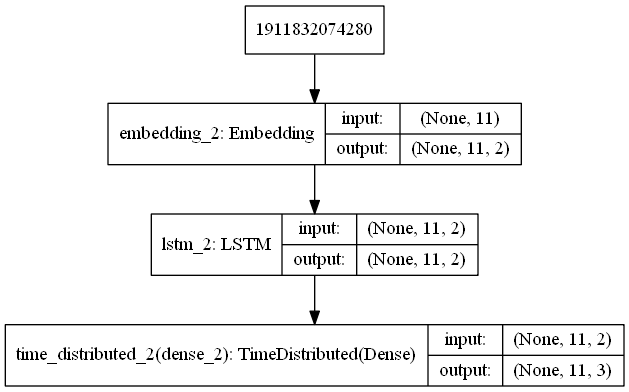

In [82]:
model2 = Sequential()
model2.add(Embedding(NUM_CHAR, 2, input_length=MAXLEN))
model2.add(LSTM(2, return_sequences=True, go_backwards=True))
model2.add(TimeDistributed(Dense(3, activation='softmax')))
model2.summary()
plot_model(model2, to_file='model2.png', show_shapes=True)
Image('model2.png')

In [83]:
model2.compile(optimizer=Adam(lr=.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(padded, y2, batch_size=1, epochs=300)

Epoch 1/300
16/16 [==============================] - 1s 52ms/step - loss: 0.9769 - acc: 0.7727
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 0.6618 - acc: 0.8182
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 0.5788 - acc: 0.8182
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 0.5711 - acc: 0.8182
Epoch 5/300
16/16 [==============================] - 0s 4ms/step - loss: 0.5566 - acc: 0.8182
Epoch 6/300
16/16 [==============================] - 0s 4ms/step - loss: 0.5462 - acc: 0.8182
Epoch 7/300
16/16 [==============================] - 0s 5ms/step - loss: 0.5327 - acc: 0.8182
Epoch 8/300
16/16 [==============================] - 0s 4ms/step - loss: 0.5158 - acc: 0.8182
Epoch 9/300
16/16 [==============================] - 0s 4ms/step - loss: 0.4895 - acc: 0.8182
Epoch 10/300
16/16 [==============================] - 0s 4ms/step - loss: 0.4676 - acc: 0.8182
Epoch 11/300
16/16 [==============================] - 0s 4

16/16 [==============================] - 0s 6ms/step - loss: 0.2122 - acc: 0.9091
Epoch 173/300
16/16 [==============================] - 0s 6ms/step - loss: 0.2180 - acc: 0.8920
Epoch 174/300
16/16 [==============================] - 0s 5ms/step - loss: 0.2144 - acc: 0.9034
Epoch 175/300
16/16 [==============================] - 0s 7ms/step - loss: 0.2133 - acc: 0.9034
Epoch 176/300
16/16 [==============================] - 0s 6ms/step - loss: 0.2155 - acc: 0.9034
Epoch 177/300
16/16 [==============================] - 0s 7ms/step - loss: 0.2129 - acc: 0.9034
Epoch 178/300
16/16 [==============================] - 0s 7ms/step - loss: 0.2166 - acc: 0.9034
Epoch 179/300
16/16 [==============================] - 0s 5ms/step - loss: 0.2178 - acc: 0.9034
Epoch 180/300
16/16 [==============================] - 0s 5ms/step - loss: 0.2126 - acc: 0.9034
Epoch 181/300
16/16 [==============================] - 0s 5ms/step - loss: 0.2145 - acc: 0.9034
Epoch 182/300
16/16 [==============================] -

In [84]:
pred2 = model2.predict(padded)
result2 = pred2.argmax(axis=2)
result2

array([[0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [85]:
get_words(padded, result2)

[[1, [[1, '오'], [2, '늘']]],
 [2, [[1, None], [2, '오'], [2, '늘']]],
 [3, [[1, None], [2, '오']]],
 [4, [[1, '오'], [2, '늘']]],
 [5, [[1, '오'], [2, '늘']]],
 [6, [[1, '오'], [2, '늘']]],
 [7, [[1, '오'], [2, '늘']]],
 [8, [[1, '늘'], [2, '은']]],
 [9, [[1, '내'], [2, '일']]],
 [10, [[1, None], [2, '내'], [2, '일']]],
 [11, [[1, None], [2, '내']]],
 [12, [[1, '내'], [2, '일']]],
 [13, [[1, '내'], [2, '일']]],
 [14, [[1, '내'], [2, '일']]],
 [15, [[1, '내'], [2, '일']]],
 [16, [[1, '일'], [2, '은']]]]

### 1.2.2 양방향 LSTM

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 11)           0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 11, 2)        28          input_1[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LSTM)                   (None, 11, 2)        40          embedding_3[0][0]                
__________________________________________________________________________________________________
lstm_4 (LSTM)                   (None, 11, 2)        40          embedding_3[0][0]                
__________________________________________________________________________________________________
concatenat

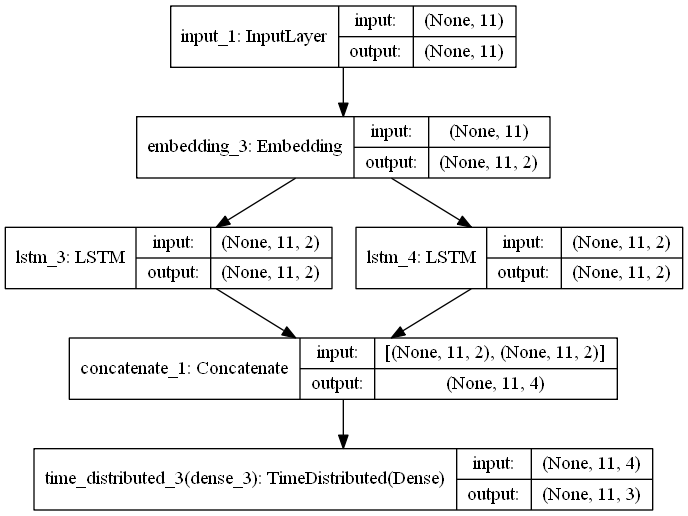

In [86]:
layer_input = Input(shape=(MAXLEN,), dtype='int32')
layer_embed = Embedding(NUM_CHAR, 2, input_length=MAXLEN)(layer_input)
layer_forward = LSTM(2, return_sequences=True)(layer_embed)
layer_backward = LSTM(2, return_sequences=True, go_backwards=True)(layer_embed)
merged_layers = concatenate([layer_forward, layer_backward])
layer_label = (TimeDistributed(Dense(3, activation='softmax')))(merged_layers)
model3 = Model(layer_input, layer_label)
model3.summary()
plot_model(model3, to_file='model3.png', show_shapes=True)
Image('model3.png')

In [87]:
model3.compile(optimizer=Adam(lr=.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.fit(padded, y2, batch_size=1, epochs=300)

Epoch 1/300
16/16 [==============================] - 3s 173ms/step - loss: 0.9428 - acc: 0.7955
Epoch 2/300
16/16 [==============================] - 0s 10ms/step - loss: 0.6339 - acc: 0.8182
Epoch 3/300
16/16 [==============================] - 0s 9ms/step - loss: 0.5556 - acc: 0.8182
Epoch 4/300
16/16 [==============================] - 0s 9ms/step - loss: 0.5070 - acc: 0.8182
Epoch 5/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4514 - acc: 0.8182
Epoch 6/300
16/16 [==============================] - 0s 9ms/step - loss: 0.3837 - acc: 0.8182
Epoch 7/300
16/16 [==============================] - 0s 8ms/step - loss: 0.3011 - acc: 0.8409
Epoch 8/300
16/16 [==============================] - 0s 7ms/step - loss: 0.2237 - acc: 0.9034
Epoch 9/300
16/16 [==============================] - 0s 7ms/step - loss: 0.1759 - acc: 0.9261
Epoch 10/300
16/16 [==============================] - 0s 8ms/step - loss: 0.1475 - acc: 0.9716
Epoch 11/300
16/16 [==============================] - 0

16/16 [==============================] - 0s 11ms/step - loss: 3.4003e-04 - acc: 1.0000
Epoch 168/300
16/16 [==============================] - 0s 11ms/step - loss: 3.3562e-04 - acc: 1.0000
Epoch 169/300
16/16 [==============================] - 0s 11ms/step - loss: 3.3141e-04 - acc: 1.0000
Epoch 170/300
16/16 [==============================] - 0s 9ms/step - loss: 3.2726e-04 - acc: 1.0000
Epoch 171/300
16/16 [==============================] - 0s 9ms/step - loss: 3.2316e-04 - acc: 1.0000
Epoch 172/300
16/16 [==============================] - 0s 9ms/step - loss: 3.1907e-04 - acc: 1.0000
Epoch 173/300
16/16 [==============================] - 0s 9ms/step - loss: 3.1508e-04 - acc: 1.0000
Epoch 174/300
16/16 [==============================] - 0s 9ms/step - loss: 3.1124e-04 - acc: 1.0000
Epoch 175/300
16/16 [==============================] - 0s 9ms/step - loss: 3.0734e-04 - acc: 1.0000
Epoch 176/300
16/16 [==============================] - 0s 10ms/step - loss: 3.0369e-04 - acc: 1.0000
Epoch 177/

Epoch 248/300
16/16 [==============================] - 0s 11ms/step - loss: 1.3759e-04 - acc: 1.0000
Epoch 249/300
16/16 [==============================] - 0s 10ms/step - loss: 1.3626e-04 - acc: 1.0000
Epoch 250/300
16/16 [==============================] - 0s 11ms/step - loss: 1.3485e-04 - acc: 1.0000
Epoch 251/300
16/16 [==============================] - 0s 11ms/step - loss: 1.3352e-04 - acc: 1.0000
Epoch 252/300
16/16 [==============================] - 0s 19ms/step - loss: 1.3222e-04 - acc: 1.0000
Epoch 253/300
16/16 [==============================] - 0s 23ms/step - loss: 1.3086e-04 - acc: 1.0000
Epoch 254/300
16/16 [==============================] - 0s 15ms/step - loss: 1.2956e-04 - acc: 1.0000
Epoch 255/300
16/16 [==============================] - 0s 15ms/step - loss: 1.2827e-04 - acc: 1.0000
Epoch 256/300
16/16 [==============================] - 0s 17ms/step - loss: 1.2704e-04 - acc: 1.0000
Epoch 257/300
16/16 [==============================] - 0s 17ms/step - loss: 1.2579e-04 - ac

In [88]:
pred3 = model3.predict(padded)
result3 = pred3.argmax(axis=2)
result3

array([[0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [89]:
get_words(padded, result3)

[[1, [[1, '오'], [2, '늘']]],
 [2, [[1, '오'], [2, '늘']]],
 [3, [[1, '오'], [2, '늘']]],
 [4, [[1, '오'], [2, '늘']]],
 [5, [[1, '오'], [2, '늘']]],
 [6, [[1, '오'], [2, '늘']]],
 [7, [[1, '오'], [2, '늘']]],
 [8, [[1, '오'], [2, '늘']]],
 [9, [[1, '내'], [2, '일']]],
 [10, [[1, '내'], [2, '일']]],
 [11, [[1, '내'], [2, '일']]],
 [12, [[1, '내'], [2, '일']]],
 [13, [[1, '내'], [2, '일']]],
 [14, [[1, '내'], [2, '일']]],
 [15, [[1, '내'], [2, '일']]],
 [16, [[1, '내'], [2, '일']]]]